Importing Libraries

In [60]:

!pip install bing-image-downloader
from bing_image_downloader import downloader
#from PIL import Image
import glob
import os

import keras
from keras import layers

import numpy as np
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

**Web Scraping**
The images are web scraped from the bing image downloader package. The images are chosen in accordance to objects who's indentification would help visually disabled folks! About 400 images are scrapped for each object.

In [ ]:
downloader.download("car", limit=400,  output_dir='/drive/MyDrive/train', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("tree", limit=400,  output_dir='/drive/MyDrive/train', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("plane", limit=400,  output_dir='/drive/MyDrive/train', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("woman", limit=400,  output_dir='/drive/MyDrive/train', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("truck", limit=400,  output_dir='/drive/MyDrive/train', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("dog", limit=400,  output_dir='/drive/MyDrive/train', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("table", limit=400,  output_dir='/drive/MyDrive/train', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("cycle", limit=400,  output_dir='/drive/MyDrive/train', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("microwave", limit=400,  output_dir='/drive/MyDrive/train', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download("computer", limit=400,  output_dir='/drive/MyDrive/train', adult_filter_off=True, force_replace=False, timeout=60)


Plotting an Image of some classes

Populating the interactive namespace from numpy and matplotlib


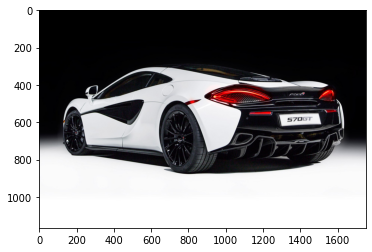

In [94]:
# Car
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/train/car/Image_10.jpg')
imgplot = plt.imshow(img)
plt.show()


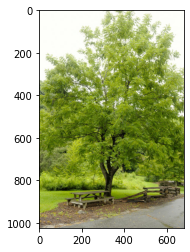

In [119]:
#Tree
img = mpimg.imread('/content/drive/MyDrive/train/tree/Image_1.jpg')
imgplot = plt.imshow(img)
plt.show()

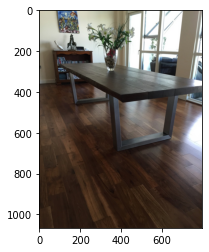

In [120]:
#Table
img = mpimg.imread('/content/drive/MyDrive/train/table/Image_1.jpg')
imgplot = plt.imshow(img)
plt.show()

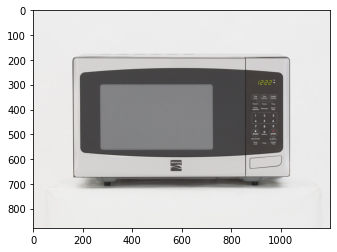

In [121]:
#Microwave
img = mpimg.imread('/content/drive/MyDrive/train/microwave/Image_1.jpg')
imgplot = plt.imshow(img)
plt.show()

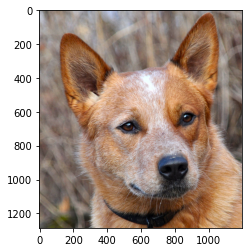

In [122]:
#Dog
img = mpimg.imread('/content/drive/MyDrive/train/dog/Image_1.jpg')
imgplot = plt.imshow(img)
plt.show()

Converting images into numpy arrays and splitting into train and validation set

In [70]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train',
    target_size=(300, 300),
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train',
    target_size=(300,300),
    class_mode='categorical',
    subset='validation') # set as validation data


Found 3177 images belonging to 10 classes.
Found 792 images belonging to 10 classes.


In [71]:
train_generator.class_indices

{'car': 0,
 'computer': 1,
 'cycle': 2,
 'dog': 3,
 'microwave': 4,
 'plane': 5,
 'table': 6,
 'tree': 7,
 'truck': 8,
 'woman': 9}

Fitting the CNN

In [103]:
model=Sequential()
model.add(Convolution2D(32,(3,3), input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit_generator(train_generator,steps_per_epoch=54,epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
 3/54 [>.............................] - ETA: 7:20 - loss: 31.9995 - accuracy: 0.1042

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


54/54 [==============================] - 577s 11s/step - loss: 8.2414 - accuracy: 0.2346 - val_loss: 2.0365 - val_accuracy: 0.3535
Epoch 2/10
54/54 [==============================] - 375s 7s/step - loss: 1.6779 - accuracy: 0.4578 - val_loss: 1.4628 - val_accuracy: 0.5189
Epoch 3/10
54/54 [==============================] - 307s 6s/step - loss: 1.3139 - accuracy: 0.5642 - val_loss: 1.4190 - val_accuracy: 0.5429
Epoch 4/10
54/54 [==============================] - 284s 5s/step - loss: 1.0846 - accuracy: 0.6400 - val_loss: 1.1663 - val_accuracy: 0.6263
Epoch 5/10
54/54 [==============================] - 273s 5s/step - loss: 0.9221 - accuracy: 0.7031 - val_loss: 1.1411 - val_accuracy: 0.6301
Epoch 6/10
54/54 [==============================] - 263s 5s/step - loss: 0.8708 - accuracy: 0.7159 - val_loss: 1.0692 - val_accuracy: 0.6831
Epoch 7/10
54/54 [==============================] - 261s 5s/step - loss: 0.7578 - accuracy: 0.7607 - val_loss: 0.9680 - val_accuracy: 0.7197
Epoch 8/10
54/54 [=====

Model has achieved 83.22% accuracy on train data and 75% accuracy on validation data

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


**Prediction of Tree (Class 7)**

In [113]:
from tensorflow.keras.preprocessing import image
img= image.load_img("/content/drive/MyDrive/test/Image_1.jpg",target_size=(300,300))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

pred=model.predict_classes(x)
pred

array([7])

**Prediction of cycle (Class 2)**

In [118]:
img=image.load_img("/content/drive/MyDrive/test/Image_3.jpg",target_size=(300,300))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

pred=model.predict_classes(x)
pred

array([2])